# Mini-Workshop Line Graph (Finished)

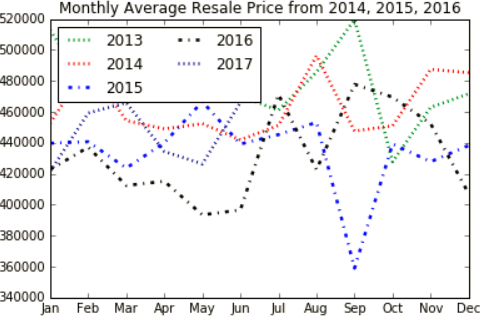

The Graph requires Data with average monthly resale price for year of 14, 15, and 16
We need to get the data by year, month, and montly average resale

In [6]:
#Getting the data

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df = pd.read_csv("resale-sample-regression.csv", index_col=0)



In [7]:
#creating two new columns in the DF : Year and Quarterly
df['Year'], df['Quarter'] = df['month'].str.split('-',1).str
df.head(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Region,Year,Quarter
87705,2016-11,ANG MO KIO,4 ROOM,326,ANG MO KIO AVE 3,10 TO 12,92.0,New Generation,1977,590000.0,North East,2016,11
86039,2016-10,ANG MO KIO,4 ROOM,428,ANG MO KIO AVE 3,10 TO 12,92.0,New Generation,1978,490000.0,North East,2016,10


In [8]:
grouped = df['resale_price'].groupby([df['Year'], df['Quarter']])

In [9]:
groupMean=grouped.mean()

In [10]:
groupMean.head(3)

Year  Quarter
2012  03         477562.222222
      04         434671.428571
      05         480906.545455
Name: resale_price, dtype: float64

In [11]:
groupMean.index


MultiIndex(levels=[['2012', '2013', '2014', '2015', '2016', '2017'], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5]],
           names=['Year', 'Quarter'])

In [12]:
df=pd.DataFrame(groupMean)

In [13]:
df.head(4)


resale_price
Year Quarter               
2012 03       477562.222222
     04       434671.428571
     05       480906.545455
     06       418536.000000

In [14]:
df.xs('2014').head(4)

,resale_price
Quarter,
01,452680.000000
02,490473.684211
03,454303.481481
04,448995.520000


In [15]:
b=df.xs('2014')
b.index.values

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [16]:
df.xs('2014').resale_price

Quarter
01    452680.000000
02    490473.684211
03    454303.481481
04    448995.520000
05    452354.166667
06    441892.689655
07    451181.037037
08    496365.517241
09    447559.200000
10    450961.411765
11    487443.555556
12    485293.103448
Name: resale_price, dtype: float64

In [17]:
# Get only December for all years
df.xs('12', level='Quarter')

,resale_price
Year,
2012,455626.441176
2013,471669.833333
2014,485293.103448
2015,438255.466667
2016,407162.933333


In [18]:
df.sortlevel(inplace=True)

C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  """Entry point for launching an IPython kernel.


In [19]:
df.sort_index(level=['Year', 'Quarter'], inplace=True)

In [20]:
df.head(3)

resale_price
Year Quarter               
2012 03       477562.222222
     04       434671.428571
     05       480906.545455

In [21]:
check=df.reset_index(inplace=False)
check.head(3)

,Year,Quarter,resale_price
0,2012,03,477562.222222
1,2012,04,434671.428571
2,2012,05,480906.545455


https://www.somebits.com/~nelson/pandas-multiindex-slice-demo.html

Text(0.5,1,'Monthly Average Resale Price from 2014, 2015, 2016')

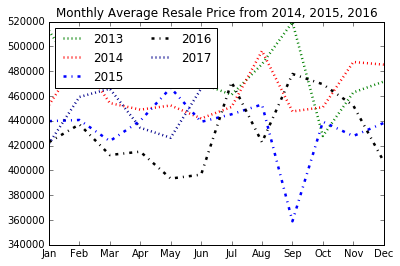

In [22]:

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


########################################## Your program Start HERE ##################################

plt.plot(df.xs('2013').resale_price,  color="green", linewidth=2.5, linestyle="dotted", label="2013")
plt.plot(df.xs('2014').resale_price,  color="red", linewidth=2.5, linestyle="dotted", label="2014")
plt.plot(df.xs('2015').resale_price,  color="blue", linewidth=2.5, linestyle="dashdot", label="2015")
plt.plot(df.xs('2016').resale_price,  color="black", linewidth=2.5, linestyle="dashdot", label="2016")
plt.plot(df.xs('2017').resale_price,  color="darkblue", linewidth=2.5, linestyle="dotted", label="2017")



########################################## Your program End HERE ##################################




plt.xticks(b.index.values,
          ["Jan", "Feb","Mar","Apr","May","Jun", "Jul","Aug","Sep","Oct", "Nov","Dec"])


plt.legend( ncol=2, loc='upper left');
plt.title('Monthly Average Resale Price from 2014, 2015, 2016')
